In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# tells the IPython kernel to display plots in the output cells of the notebook
# import warnings
# warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

# change the maximum column visible on screen
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("diabetes.csv", index_col= None)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("The columns are:",df.columns)
print("The shape of the dataframe is:", df.shape)

The columns are: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
The shape of the dataframe is: (768, 9)


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
for column in df.columns:
    print(column,"has", df[column].nunique(), " number of unique categories.")

Pregnancies has 17  number of unique categories.
Glucose has 136  number of unique categories.
BloodPressure has 47  number of unique categories.
SkinThickness has 51  number of unique categories.
Insulin has 186  number of unique categories.
BMI has 248  number of unique categories.
DiabetesPedigreeFunction has 517  number of unique categories.
Age has 52  number of unique categories.
Outcome has 2  number of unique categories.


### Observations:
- There are no null values in any of the columns
- There are significant differences between the mean and median of insulin indicating that there might be many outliers
- Is the blood pressure systolic or diastolic?
- Average BMI is also between overweight and obese.

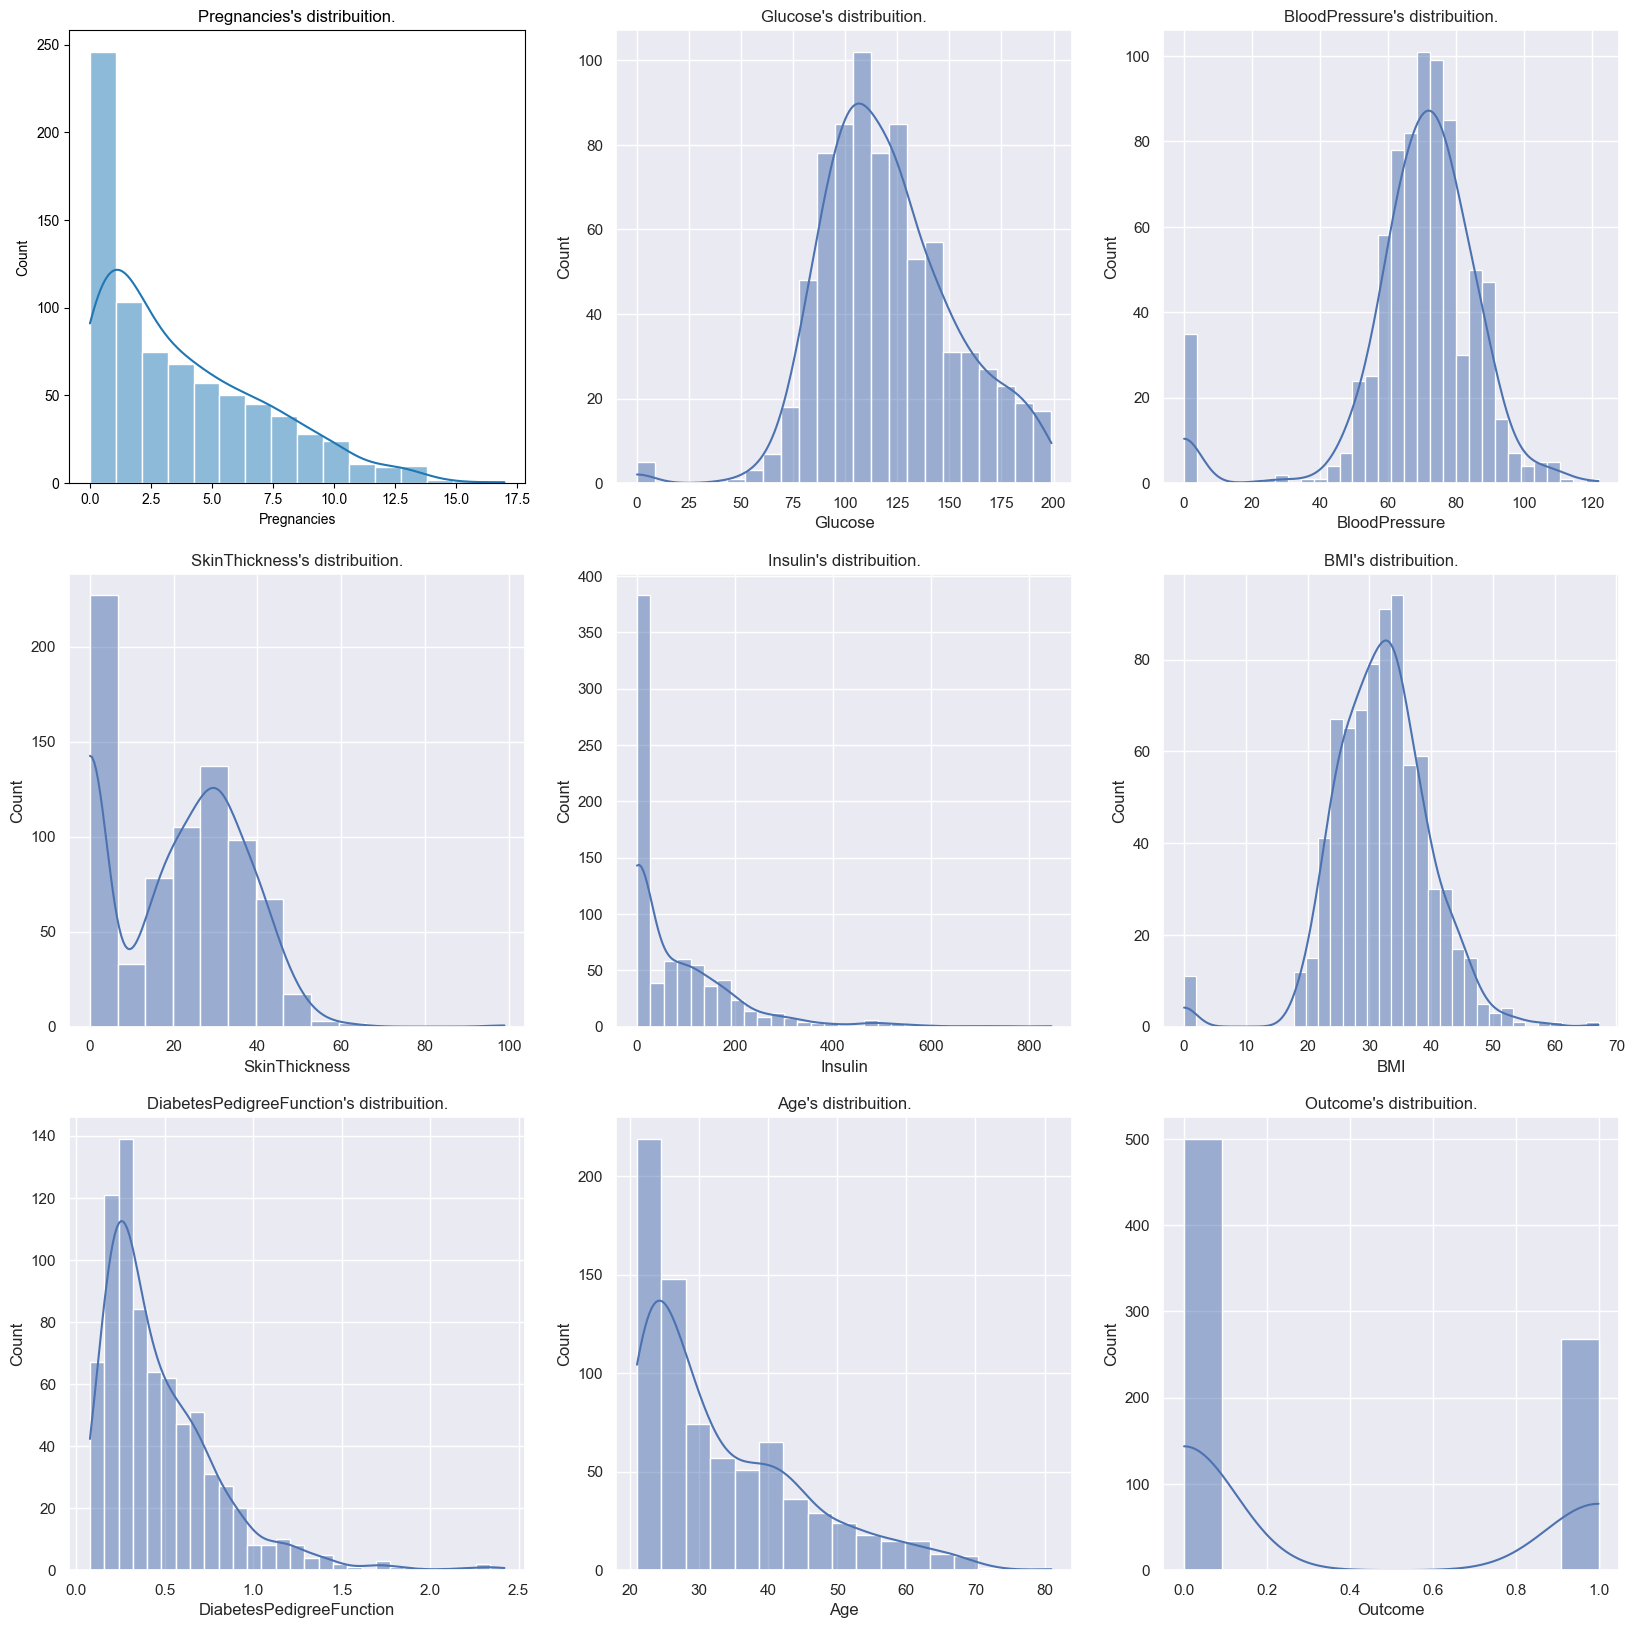

In [7]:
plt.figure(figsize=(20,20))# size of the entire output
for tups in enumerate(df.columns):
    plt.subplot(3, 3, tups[0]+1)# 3 * 3 boxes; tup[0] are the indexes
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=df, x=tups[1], kde=True) # here we use kernel destiny estimation for smoothing the histplots
    plt.title("{}'s distribuition.".format(tups[1]))

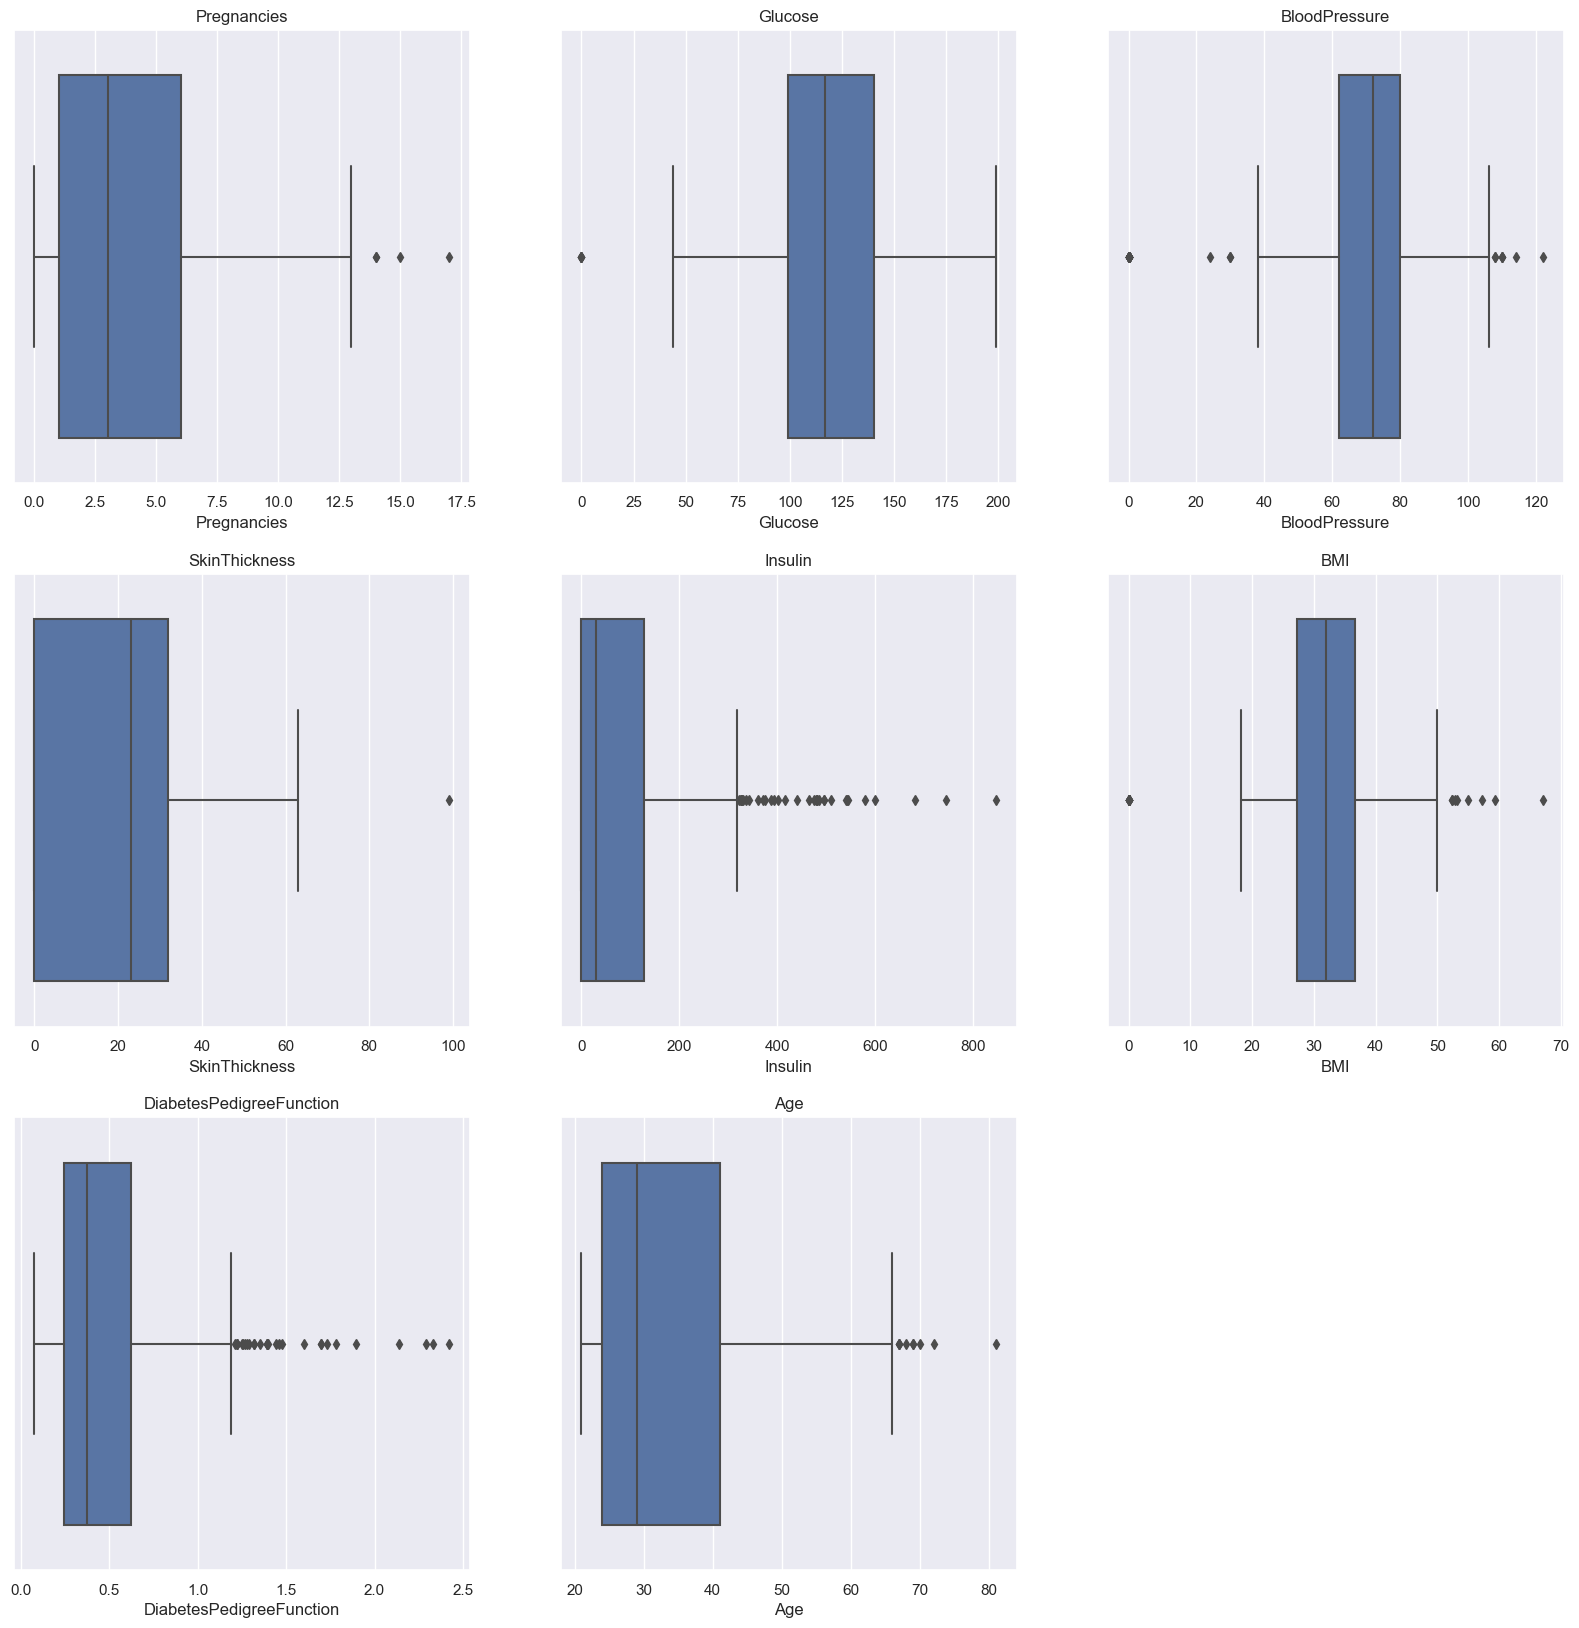

In [8]:
independent_feature = [column for column in df.columns if column not in ['Outcome']]
plt.figure(figsize=(20,20))
for tups in enumerate(independent_feature):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=tups[1])
    plt.title("{}".format(tups[1]))

In [9]:
def outlier_trimmer(data_set, feature, trimming_value, pos = 'upper'):
    threshold=data_set[feature].quantile(trimming_value/100)
    if pos == 'lower':
        data_set=data_set[data_set[feature]>threshold]
    else:
        data_set=data_set[data_set[feature]<threshold]
    return data_set

In [10]:
for column in ['BloodPressure','SkinThickness','BMI','Age']:
    df = outlier_trimmer(df, column, 99)
print("Shape of dataframe after trimming BloodPressure, SkinThickness, BMI and age is: ",df.shape)
    
for column in ['Insulin','DiabetesPedigreeFunction']:
    df = outlier_trimmer(df, column, 96)
print("Shape of dataframe after trimming Insulin and DiabetesPedigreeFunction is: ",df.shape)
 
for column in ['BMI','Glucose', 'BloodPressure']:
    df = outlier_trimmer(df, column, 0.5, 'lower')
print("Shape of dataframe after trimming BloodPressure, Glucose and BMI is: ",df.shape)

Shape of dataframe after trimming BloodPressure, SkinThickness, BMI and age is:  (733, 9)
Shape of dataframe after trimming Insulin and DiabetesPedigreeFunction is:  (672, 9)
Shape of dataframe after trimming BloodPressure, Glucose and BMI is:  (632, 9)


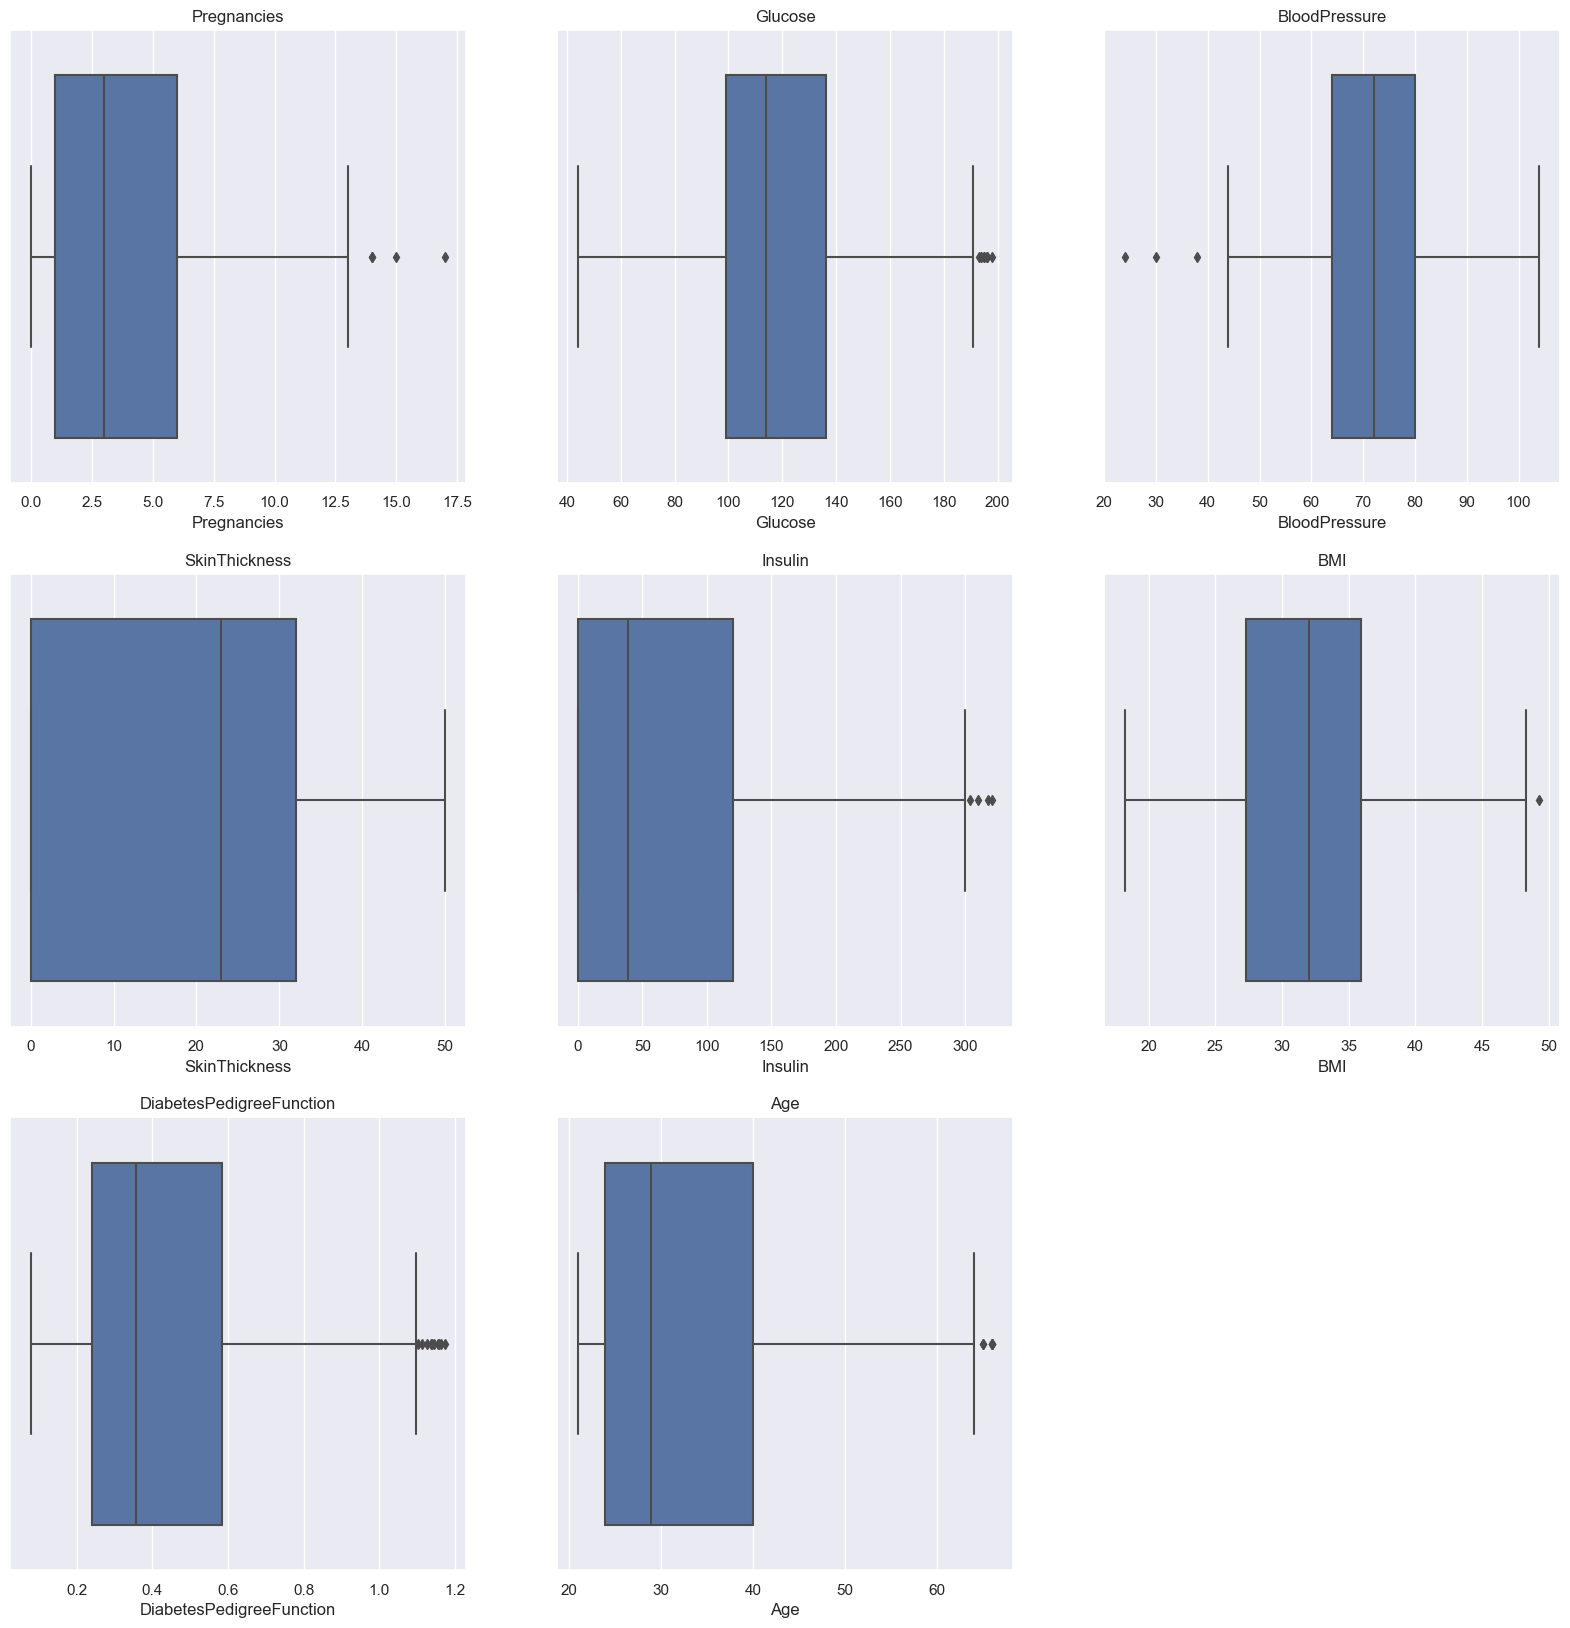

In [11]:
plt.figure(figsize=(20,20))
for tups in enumerate(independent_feature):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=tups[1])
    plt.title("{}".format(tups[1]))